TODO (https://wikidocs.net/31063)
- orderbook에 유용한 데이터가 있을까 ?




In [93]:
import pyupbit
import time
import numpy as np
 
tickers = pyupbit.get_tickers()

coin_sym = "KRW-IOTA"


코인 SYMBOL을 아래와 같이 얻어 온다

In [10]:
price = pyupbit.get_current_price(coin_sym)
print(price)

# df = pyupbit.get_ohlcv(coin_sym)

# print(df)


2600.0


orderbook을 기준으로 정보를 뽑아내고 싶다..

In [37]:
orderbook = pyupbit.get_orderbook(coin_sym)

1. draw function
2. load function

In [141]:
def cal_com(x, m):
    com = np.sum(x*m)/np.sum(m)
    
    return com

In [154]:
import matplotlib
import matplotlib.pyplot as plt

def aux_info(info):
    # 
    com_bid = cal_com(info[:,0], info[:,2])
    mas_bid = np.sum(info[:,2])
    com_ask = cal_com(info[:,1], info[:,3])
    mas_ask = np.sum(info[:,3])
    plt.axvline(x=com_bid)    
    plt.axvline(x=com_ask)
    
    print(com_bid, com_ask, com_bid-com_ask, mas_ask, mas_bid, mas_ask/mas_bid)    

#plot infor
def draw_orderbook(info):
        
    fig, ax = plt.subplots()
    ax.plot(info[:,0], info[:,2])
    ax.plot(info[:,1], info[:,3])
    
    aux_info(info)
    #
    tm = time.localtime(orderbook[0]["timestamp"]/1000)
    string = time.strftime('%Y-%m-%d %I:%M:%S %p', tm)

    ax.set(xlabel='current (krw)', ylabel='volume (iota)',title=string)
    ax.grid()

In [118]:
def load_orderbook(coin):
    orderbook = pyupbit.get_orderbook(coin_sym)
    tm = time.localtime(orderbook[0]["timestamp"]/1000)
    
    info = []
    
    for item in orderbook[0]["orderbook_units"]:
        info.append(list(item.values()))
        
    info = np.array(info)
    
    return tm, info

2631.6853538429855 2541.116964416105 90.56838942688046 105277.90415439001 22428.578129619997 4.693917891092533


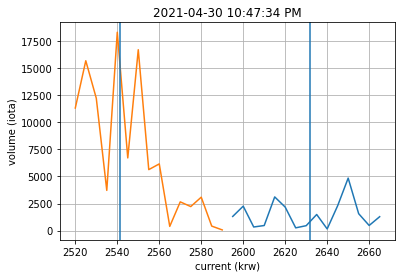

2595.0


In [167]:
# coin_sym = "KRW-BTC"

for i in range(0, 1):
    price = pyupbit.get_current_price(coin_sym)  
    tm, info = load_orderbook(coin_sym)
    
    #plot infor
    draw_orderbook(info)
    plt.show()
    
    #
    print(price)